In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import re
sns.set_style('darkgrid')


## Extraindo os dados

In [3]:
level_sensor_column_name = '.........Data e Hora..........Nível (cm)'
rain_sensor_column_name = '.........Data e Hora..........Chuva (mm)'

In [92]:
def get_df_from_txt(filename, header, target):
    df = pd.read_table(filename)
    df_info = df[header].str.replace(' +', ' ', regex=True)
    df_info = df_info.str.split(' ')
    df['data'] = df_info.str.get(1) + " " + df_info.str.get(2).transform(lambda x: x.strip())
    df[target] = df_info.str.get(3)
    df[target] = pd.to_numeric(df[target], errors='coerce').astype('Float64')
    df.drop(header, inplace=True, axis=1)
    return df

In [96]:
# Taió
rain_taio = get_df_from_txt('83050000TAIÓ_2962005-1442014-chuva.txt', rain_sensor_column_name, 'rain_taio')
river_level_taio = get_df_from_txt('83050000TAIÓ_2962005-1442014-nível.txt', level_sensor_column_name, 'river_level_taio')

In [98]:
# Ituporanga
rain_ituporanga = get_df_from_txt('83250000ITUPORANGA_3172005-1442014-chuva.txt', rain_sensor_column_name, 'rain_ituporanga')
river_level_ituporanga = get_df_from_txt('83250000ITUPORANGA_2962005-1032014-nível.txt', level_sensor_column_name, 'river_level_ituporanga')

,data,river_level_ituporanga
12482,00:00:00,<NA>


In [100]:
# Rio do Sul
river_level_rio_do_sul = get_df_from_txt('83300200RIODOSUL-NOVO_2982005-1422014 -nível.txt', level_sensor_column_name, 'river_level_rio_do_sul')

In [108]:
df = pd.merge(rain_taio, river_level_taio, how = 'outer')
df = pd.merge(df, rain_ituporanga, how = 'outer')
df = pd.merge(df, river_level_ituporanga, how = 'outer')
df = pd.merge(df, river_level_rio_do_sul, how = 'outer')
df = df[df.apply(lambda x: True if (len(x.data)) == 19 else False,axis=1)]
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 138003 entries, 0 to 138005
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   data                    138003 non-null  object 
 1   rain_taio               123010 non-null  Float64
 2   river_level_taio        107298 non-null  Float64
 3   rain_ituporanga         114192 non-null  Float64
 4   river_level_ituporanga  83710 non-null   Float64
 5   river_level_rio_do_sul  117075 non-null  Float64
dtypes: Float64(5), object(1)
memory usage: 8.0+ MB


In [23]:
df.head(30)

,data,rain_taio,river_level_taio,rain_ituporanga,river_level_ituporanga,river_level_rio_do_sul
0,29/06/2005 00:00:00,<NA>,<NA>,<NA>,<NA>,<NA>
1,29/06/2005 01:00:00,<NA>,<NA>,<NA>,<NA>,<NA>
2,29/06/2005 02:00:00,<NA>,<NA>,<NA>,<NA>,<NA>
3,29/06/2005 03:00:00,<NA>,110.0,<NA>,<NA>,107.0
4,29/06/2005 04:00:00,<NA>,<NA>,<NA>,<NA>,108.0
5,29/06/2005 05:00:00,0.0,<NA>,<NA>,<NA>,106.0
6,29/06/2005 06:00:00,0.0,<NA>,<NA>,26.0,106.0
7,29/06/2005 07:00:00,0.0,<NA>,<NA>,27.0,105.0
8,29/06/2005 08:00:00,0.0,<NA>,<NA>,26.0,106.0
9,29/06/2005 09:00:00,0.0,<NA>,<NA>,27.0,105.0


## Limpando os dados

Linhas contendo qualquer valor nulo em uma ou mais colunas são removidas

In [109]:
df = df.dropna(how='any')  
df['data'] = df['data'].apply(lambda x: pd.to_datetime(x))
df.reset_index(drop = True)

,data,rain_taio,river_level_taio,rain_ituporanga,river_level_ituporanga,river_level_rio_do_sul
0,2005-07-31 21:00:00,0.0,98.0,3.0,30.0,171.0
1,2005-07-31 22:00:00,0.0,98.0,12.0,39.0,171.0
2,2005-07-31 23:00:00,0.0,97.0,19.0,59.0,171.0
3,2005-01-08 00:00:00,0.0,97.0,5.0,82.0,170.0
4,2005-01-08 03:00:00,0.0,97.0,1.0,27.0,170.0
...,...,...,...,...,...,...
67114,2014-02-24 15:30:00,0.0,142.0,0.0,87.0,174.0
67115,2014-02-25 01:15:00,0.0,152.0,0.0,54.0,180.0
67116,2014-02-25 01:45:00,0.0,152.0,0.0,54.0,179.0
67117,2014-02-25 02:30:00,0.0,151.0,0.0,54.0,178.0


In [110]:
df.corr(numeric_only=True)

,rain_taio,river_level_taio,rain_ituporanga,river_level_ituporanga,river_level_rio_do_sul
rain_taio,1.000000,0.005800,0.140605,0.012642,-0.000536
river_level_taio,0.005800,1.000000,0.018446,0.811105,0.945354
rain_ituporanga,0.140605,0.018446,1.000000,0.035569,0.021666
river_level_ituporanga,0.012642,0.811105,0.035569,1.000000,0.893384
river_level_rio_do_sul,-0.000536,0.945354,0.021666,0.893384,1.000000


## Estabelecendo a correlação entre as variáveis

In [111]:
df.corr(numeric_only=True).loc['river_level_rio_do_sul'].sort_values(ascending=False)

river_level_rio_do_sul    1.000000
river_level_taio          0.945354
river_level_ituporanga    0.893384
rain_ituporanga           0.021666
rain_taio                -0.000536
Name: river_level_rio_do_sul, dtype: float64

## Análise Exploratória

array([[<AxesSubplot: title={'center': 'data'}>,
        <AxesSubplot: title={'center': 'rain_taio'}>],
       [<AxesSubplot: title={'center': 'river_level_taio'}>,
        <AxesSubplot: title={'center': 'rain_ituporanga'}>],
       [<AxesSubplot: title={'center': 'river_level_ituporanga'}>,
        <AxesSubplot: title={'center': 'river_level_rio_do_sul'}>]],
      dtype=object)

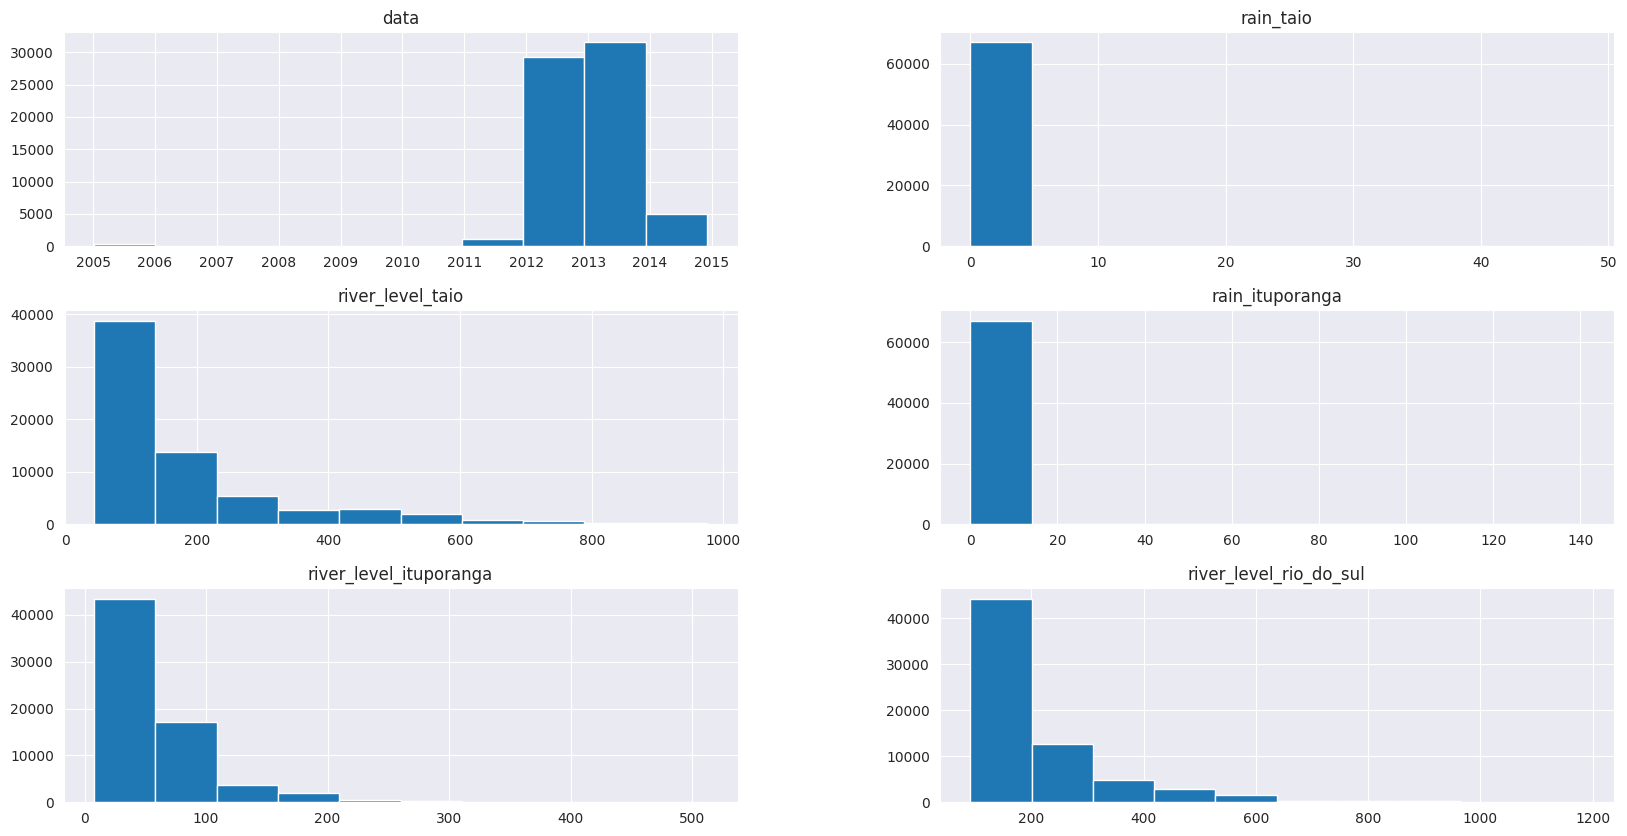

In [112]:
df.hist(figsize=(20, 10))

<AxesSubplot: >

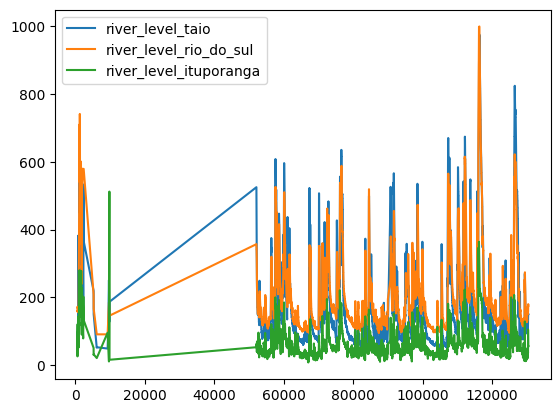

In [28]:
df_plot = df[['river_level_taio', 'river_level_rio_do_sul', 'river_level_ituporanga']]
df_plot.plot.line()

<AxesSubplot: >

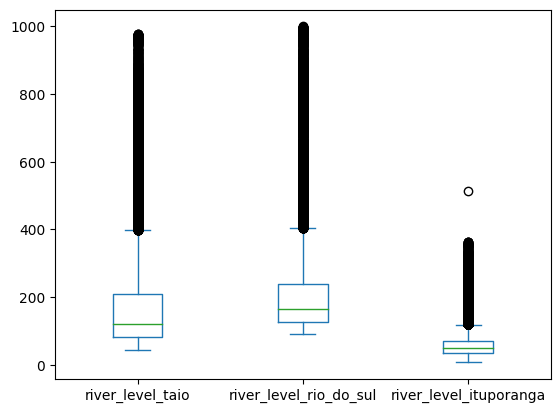

In [29]:
df_plot.plot.box()

<AxesSubplot: xlabel='data', ylabel='river_level_rio_do_sul'>

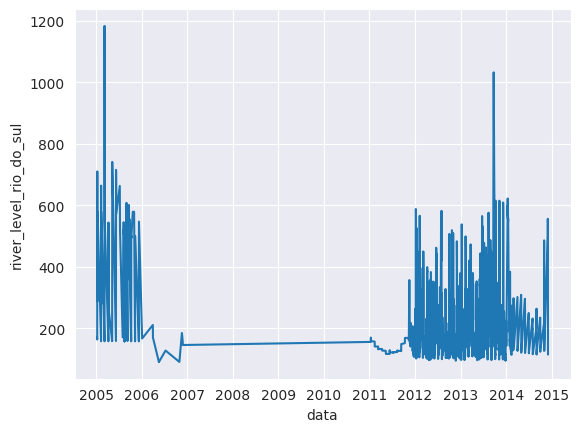

In [116]:
# Relação tempo x nível do rio em Rio do Sul
sns.lineplot(data=df, x='data', y='river_level_rio_do_sul')

<AxesSubplot: xlabel='data', ylabel='rain_taio'>

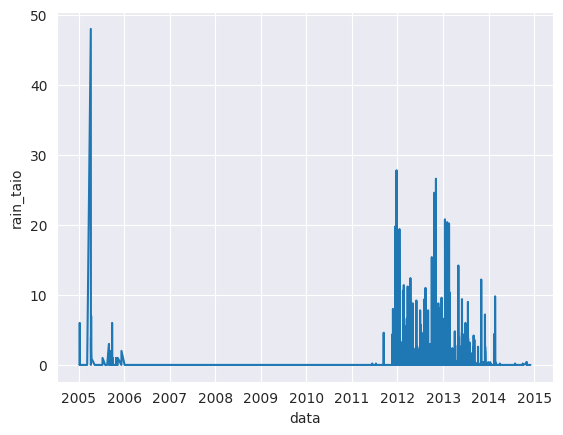

In [119]:
# Relação tempo x chuva em Taió
sns.lineplot(data=df, x='data', y='rain_taio')

In [ ]:
# Relação tempo x chuva em Taió
sns.lineplot(data=df, x='data', y='rain_taio')

In [ ]:
# Relação tempo x chuva em Ituporanga
sns.lineplot(data=df, x='data', y='rain_taio')

## Aplicando regressão linear

In [30]:
# Teste utilizando divisão manual e ordenada, resultados semelhantes
train_size = 0.7
train_end = int(len(df)*train_size)

df_train = df[:train_end]
dfx_train = df_train[['river_level_taio', 'river_level_ituporanga', 'rain_ituporanga']]
dfy_train = df_train[['river_level_rio_do_sul']]

df_test = df[train_end:]
dfx_test = df_test[['river_level_taio', 'river_level_ituporanga', 'rain_ituporanga']]
dfy_test = df_test[['river_level_rio_do_sul']]

In [31]:
linear_regression = LinearRegression()

In [32]:
linear_regression.fit(dfx_train.values, dfy_train.values)

LinearRegression()

In [33]:
# Teste de predição
linear_regression.predict([[573, 114, 0.8]])

array([[461.53421216]])

In [34]:
predict_values = linear_regression.predict(dfx_test.values)

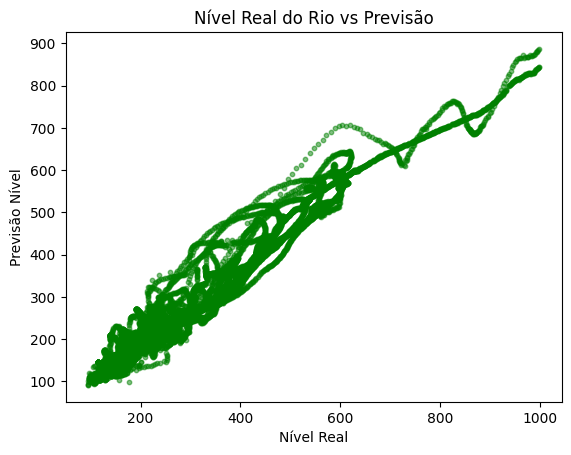

In [35]:
import matplotlib.pyplot as plt

plt.scatter(dfy_test.values, predict_values, s=10, c= ['green'], alpha=0.5)

plt.xlabel("Nível Real")
plt.ylabel("Previsão Nível")
plt.title("Nível Real do Rio vs Previsão")

plt.show()

## Métricas

In [41]:
from sklearn.metrics import r2_score 

R2 = r2_score(dfy_test.values,predict_values)
print("Valor do R² ", R2)

Valor do R²  0.9529568410826532


In [39]:
MAPE = np.mean(np.abs((dfy_test - predict_values) / dfy_test), axis=0) * 100

print("Valor do MAPE %.2f" %MAPE+"%")

Valor do MAPE 8.66%


In [40]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(dfy_test,predict_values,squared=False)
RMSE = np.sqrt(RMSE) 
print("Valor do RMSE: %.2f" %RMSE)

Valor do RMSE: 5.95
